# Project Summary
##Team 5: John Ahlquist, Zhi Fang, Bingni Guo, Chi-chen Lo, Aparna Srinivasan, Lu Sun

Team 5 decided to explore the network performance across different AWS EC2 instance types at different times of the day.  Specifically, we chose to look at `t2.nano`, `t2.large`, `t2.xlarge`, `m4.large`, and `m4.xlarge` instances at 9AM, 1PM, 4PM, and 9PM on Monday, 20 April 2020.  We chose these instances because AWS only describes their network performance in qualitative terms ("low", "low to moderate", "moderate", "moderate", and "high", respectively, shown in the table below), as opposed to providing quantitative benchmarks.  We were curious about the actual network speed each type of instance would achieve in real life conditions.

We also list the features of instance include: vCPU, Memory, Storage, Network Performance and Cost. 

|Instance   |vCPU| Mem (GiB)  | Storage  | Network Performance | Cost | 
|-----------|----|------------|----------|---------------------|------|
|  t2.nano  | 1 | 0.5  | EBS-Only	 | Low |\$0.0069 / h|
| t2.large  | 2 | 8 | EBS-Only | Low to Moderate |\$0.1104 / h|
| t2.xlarge | 4 | 16 | EBS-Only| Moderate |\$0.2208 / h|
| m4.large  | 2 | 8 | EBS-Only | Moderate |\$0.1170 / h|

We chose different times of day in the expectation that there would be peaks and troughs in overall network traffic that could affect performance.  We chose four times to represent hypothesized peak work day times (9AM, 4PM), slower workday times (1PM), and off-peak times (9PM).  All instances were "on demand" instances on the AWS uswest-2 region.  We used the `iperf` TCP test at the standard 325 KByte level.  For each instance-time we tested once per second for one hour, producing 3600 data points per session type. This produces a research design reflected in the table below:

|           | 9AM  | 1PM  | 4PM  | 9PM  | 
|-----------|------|------|------|------|
|  t2.nano  | 3600 | 3600 | 3600 | 3600 |
| t2.large  | 3600 | 3600 | 3600 | 3600 |
| t2.xlarge | 3600 | 3600 | 3600 | 3600 |
| m4.large  | 3600 | 3600 | 3600 | 3600 |


In the analysis below, we compare the instance types on the basis of mean bandwidth (Mb/s), the standard deviation, as well as maximum and minimum values.  We also noticed that all sessions started with initially very high bandwidth levels and then converged to a stable average over the course of the one hour instance.  We provide evidence describing the rate of convergence for each of the session types.

We find that the difference in speeds does not vary tremendously over the course of the day.  The `m4` sessions have the lowest variation in speed but not neccessarily the fastest times.  `t2.nano` is the slowest and highest variance.


In [0]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

We first present a summary table outlining our findings.  We then present some basic visualizations of the network preformance we observed across instances.  In all instances, we observed very consistent performance with some notable and extreme outliers.  One thing we did notice is that the more expensive instances (m.4) produced less variable network performance even if it was not the fastest on average

## Tabular and Graphical Summaries

Read in Data Files we collected.

In [0]:
df_m4large_1pm = pd.read_csv('csv/m4large_1pm.csv')
df_m4large_4pm = pd.read_csv('csv/m4large_4pm.csv')
df_m4large_9pm = pd.read_csv('csv/m4large_9pm.csv')
df_m4large_9am = pd.read_csv('csv/m4large_9am.csv')
df_t2nano_1pm = pd.read_csv('csv/t2nano_1pm.csv')
df_t2nano_4pm = pd.read_csv('csv/t2nano_4pm.csv')
df_t2nano_9pm = pd.read_csv('csv/t2nano_9pm.csv')
df_t2nano_9am = pd.read_csv('csv/t2nano_9am.csv')
df_t2large_1pm = pd.read_csv('csv/t2large_1pm.csv')
df_t2large_4pm = pd.read_csv('csv/t2large_4pm.csv')
df_t2large_9pm = pd.read_csv('csv/t2large_9pm.csv')
df_t2large_9am = pd.read_csv('csv/t2large_9am.csv')
df_t2xlarge_1pm = pd.read_csv('csv/t2xlarge_1pm.csv')
df_t2xlarge_4pm = pd.read_csv('csv/t2xlarge_4pm.csv')
df_t2xlarge_9pm = pd.read_csv('csv/t2xlarge_9pm.csv')
df_t2xlarge_9am = pd.read_csv('csv/t2xlarge_9am.csv')

def combine_instances():
    df= pd.DataFrame()
    df['t2nano_1pm'] = df_t2nano_1pm.Bandwidth
    df['t2nano_4pm'] = df_t2nano_4pm.Bandwidth
    df['t2nano_9pm'] = df_t2nano_9pm.Bandwidth
    df['t2nano_9am'] = df_t2nano_9am.Bandwidth
    df['t2large_1pm'] = df_t2large_1pm.Bandwidth
    df['t2large_4pm'] = df_t2large_4pm.Bandwidth
    df['t2large_9pm'] = df_t2large_9pm.Bandwidth
    df['t2large_9am'] = df_t2large_9am.Bandwidth
    df['t2xlarge_1pm'] = df_t2xlarge_1pm.Bandwidth
    df['t2xlarge_4pm'] = df_t2xlarge_4pm.Bandwidth
    df['t2xlarge_9pm'] = df_t2xlarge_9pm.Bandwidth
    df['t2xlarge_9am'] = df_t2xlarge_9am.Bandwidth
    df['m4large_1pm'] = df_m4large_1pm.Bandwidth
    df['m4large_4pm'] = df_m4large_4pm.Bandwidth
    df['m4large_9pm'] = df_m4large_9pm.Bandwidth
    df['m4large_9am'] = df_m4large_9am.Bandwidth
    return df
  
def combine_instances_times():
    df_t2nano = df_t2nano_1pm.append(df_t2nano_4pm).append(df_t2nano_9pm).append(df_t2nano_9am)
    df_t2large = df_t2large_1pm.append(df_t2large_4pm).append(df_t2large_9pm).append(df_t2large_9am)
    df_t2xlarge = df_t2xlarge_1pm.append(df_t2xlarge_4pm).append(df_t2xlarge_9pm).append(df_t2xlarge_9am)
    df_m4large = df_m4large_1pm.append(df_m4large_4pm).append(df_m4large_9pm).append(df_m4large_9am)
    df = pd.DataFrame()
    df['t2nano'] = df_t2nano.Bandwidth
    df['t2large'] = df_t2large.Bandwidth
    df['t2xlarge'] = df_t2xlarge.Bandwidth
    df['m4large'] = df_m4large.Bandwidth
    return df

The table below summarizes the distributions of instance performance in each time period.  The `t2.xlarge` instances were the fastest on average, as we would expect, followed by `t2.large` and `m4.large`.  `t2.nano` was by far the slowest.  The `m4.large` instances had the lowest overall variation, both in absolute terms and relative to the mean.  We do not observe consistent differences in average or maximum speeds as a function of time-of-day, nor does time-of-day correlate with variation in network speed.


In [292]:
df_instances = combine_instances()

describe_df = df_instances.describe(percentiles=[0.1,0.9,0.99])[1:9].T
describe_df['instance'] = describe_df.index
describe_df['ec2_instance'] = describe_df['instance'].apply(lambda x: x.split('_')[0])
describe_df['time'] = describe_df['instance'].apply(lambda x: x.split('_')[1])
describe_df = describe_df[['ec2_instance','time','mean','std','min','10%','50%','90%','max']]
# describe_df = describe_df.style.format({"mean": "{:20,.2f}", 
#                           "std": "{:20,.2f}", "min": "{:20,.2f}","10%": "{:20,.2f}","50%": "{:20,.2f}",
#                           "90%": "{:20,.2f}", "max": "{:20,.2f}"})##formatting
describe_df

,ec2_instance,time,mean,std,min,10%,50%,90%,max
t2nano_1pm,t2nano,1pm,49.628986,80.745979,0.501,28.3,30.4,36.7,524.0
t2nano_4pm,t2nano,4pm,49.609306,80.691304,25.200,26.2,32.5,35.7,526.0
t2nano_9pm,t2nano,9pm,49.612750,80.698915,25.200,26.2,32.5,35.7,527.0
t2nano_9am,t2nano,9am,49.613628,80.666014,1.050,26.2,32.5,35.7,525.0
t2large_1pm,t2large,1pm,526.996389,86.158462,496.000,503.0,506.0,516.0,1030.0
t2large_4pm,t2large,4pm,527.353889,87.296897,173.000,504.0,509.0,513.0,1020.0
t2large_9pm,t2large,9pm,527.398889,86.049362,500.000,505.0,509.0,513.0,1030.0
t2large_9am,t2large,9am,527.469784,109.129502,0.501,501.0,509.0,626.1,1020.0
t2xlarge_1pm,t2xlarge,1pm,754.335278,46.223133,730.000,739.0,744.0,751.0,1040.0
t2xlarge_4pm,t2xlarge,4pm,754.449167,50.183195,50.000,739.0,742.0,753.0,1030.0


The table below combines all sessions of a particular instance type.
 

In [293]:
df_instances_times = combine_instances_times()

describe_df_time = df_instances_times.describe(percentiles=[0.1,0.9,0.99])[1:9].T
describe_df_time['ec2_instance'] = describe_df_time.index
describe_df_time = describe_df_time[['ec2_instance','mean','std','min','10%','50%','90%','max']]
# describe_df_time = describe_df_time.style.format({"mean": "{:20,.2f}", 
#                           "std": "{:20,.2f}", "min": "{:20,.2f}","10%": "{:20,.2f}","50%": "{:20,.2f}",
#                           "90%": "{:20,.2f}", "max": "{:20,.2f}"})##formatting
describe_df_time

,ec2_instance,mean,std,min,10%,50%,90%,max
t2nano,t2nano,49.616167,80.692151,0.501,27.3,32.5,36.7,527.0
t2large,t2large,527.304738,92.669770,0.501,504.0,509.0,516.0,1030.0
t2xlarge,t2xlarge,754.389236,47.188829,50.000,739.0,743.0,752.0,1040.0
m4large,m4large,447.342292,15.925625,429.000,441.0,447.0,453.0,1200.0


We also visualize the distribution of four types of ec2 instances to gain a straightforward understanding.  We see very concentrated distributions with a small number of extreme values.

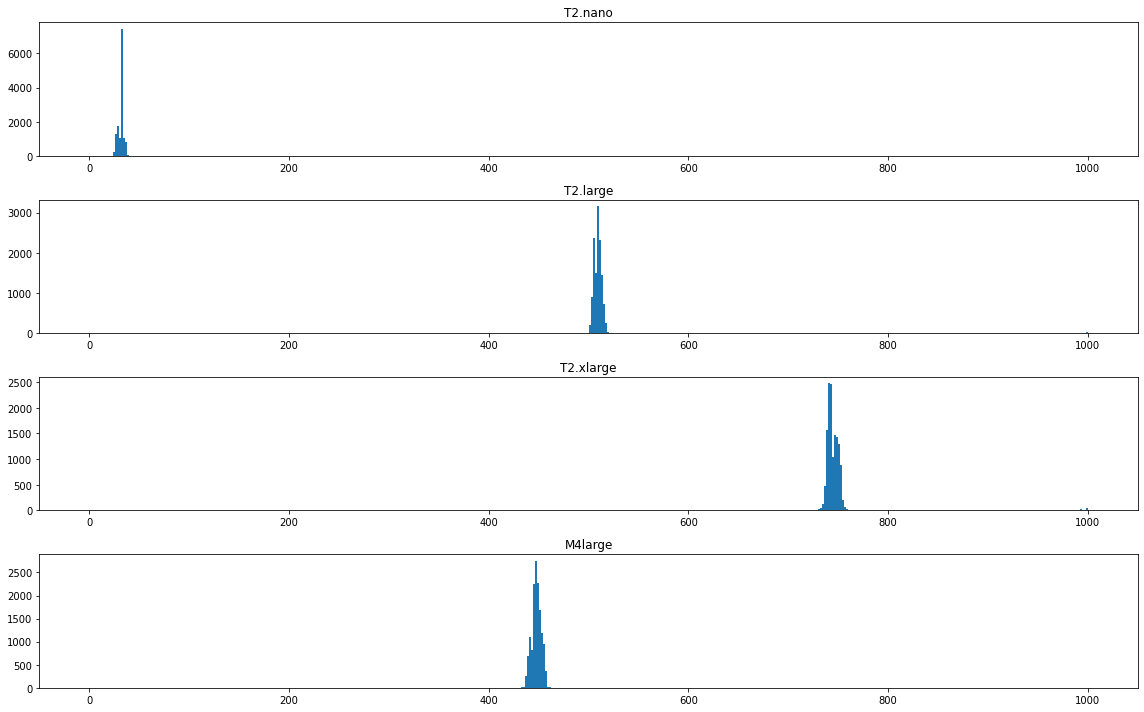

In [294]:
fig, ax = plt.subplots(4, 1, figsize=(16,10))
r = [0, 1000]
ax[0].hist(df_instances_times.t2nano, bins=500, range=r)
ax[0].set_title('T2.nano')
ax[1].hist(df_instances_times.t2large, bins=500, range=r)
ax[1].set_title('T2.large')
ax[2].hist(df_instances_times.t2xlarge, bins=500, range=r)
ax[2].set_title('T2.xlarge')
ax[3].hist(df_instances_times.m4large, bins=500, range=r)
ax[3].set_title('M4large')
fig.tight_layout()
plt.show()

In order to test whether these four type of ec2 instance has the same population mean, we used ANOVA test to compare the mean. Results showed that these four EC2 instances are significant different since p value <<< 0.01.

In [295]:
import scipy.stats as stats
stats.f_oneway(df_instances_times.t2nano, df_instances_times.t2large, df_instances_times.t2xlarge, df_instances_times.m4large)

F_onewayResult(statistic=282691.2537731883, pvalue=0.0)

We also perform a t-test for the difference in the mean values between each type of instance (column-row).  We find large and statistically significant (at better than the 99% level) differences across all of the instance types we examined.

In [296]:
from scipy.stats import ttest_ind
mean_instance = describe_df_time['mean']
#mean_instance = describe_df_time['mean']
rows, cols = (4, 4)
# l = [[' ']*cols]*rows
l = [[' ' for i in range(rows)] for j in range(cols)]
for i in range(0,4):
  for j in range(i,4):
    mean_dif = '{:.2f}'.format(mean_instance[j]-mean_instance[i])
    l[i][j] = mean_dif
    pvalue = ttest_ind(df_instances_times[instance[j]], df_instances_times[instance[i]]).pvalue
    if pvalue < 0.1:
      l[i][j] = str(mean_dif)+"***"
    else: 
      l[i][j] = str(mean_dif)

df1 = pd.DataFrame(data = l, index= ['t2nano','t2large','t2xlarge','m4large'], columns = ['t2nano','t2large','t2xlarge','m4large'])
# df2 = pd.DataFrame(data = dif, index= ['t2nano','t2large','t2xlarge','m4large'], columns = ['t2nano','t2large','t2xlarge','m4large'])
df1

,t2nano,t2large,t2xlarge,m4large
t2nano,0.00,477.69***,704.77***,397.73***
t2large,,0.00,227.08***,-79.96***
t2xlarge,,,0.00,-307.05***
m4large,,,,0.00


We also visualize the distribution of bandwidth of **T2.nano** instance.

In [0]:
# whis=[5,95] means whisker set to 5 and 95 percentile. Below or above them are shown as outliers (circles in the graph)
data = [df_t2nano_9am['Bandwidth'], df_t2nano_1pm['Bandwidth'], df_t2nano_4pm['Bandwidth'], df_t2nano_9pm['Bandwidth']]
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(data, whis=[5,95])
ax.set_xticklabels(['9am', '1pm', '4pm', '9pm'], rotation=45)
plt.title("Boxplot T2.nano")
plt.show()

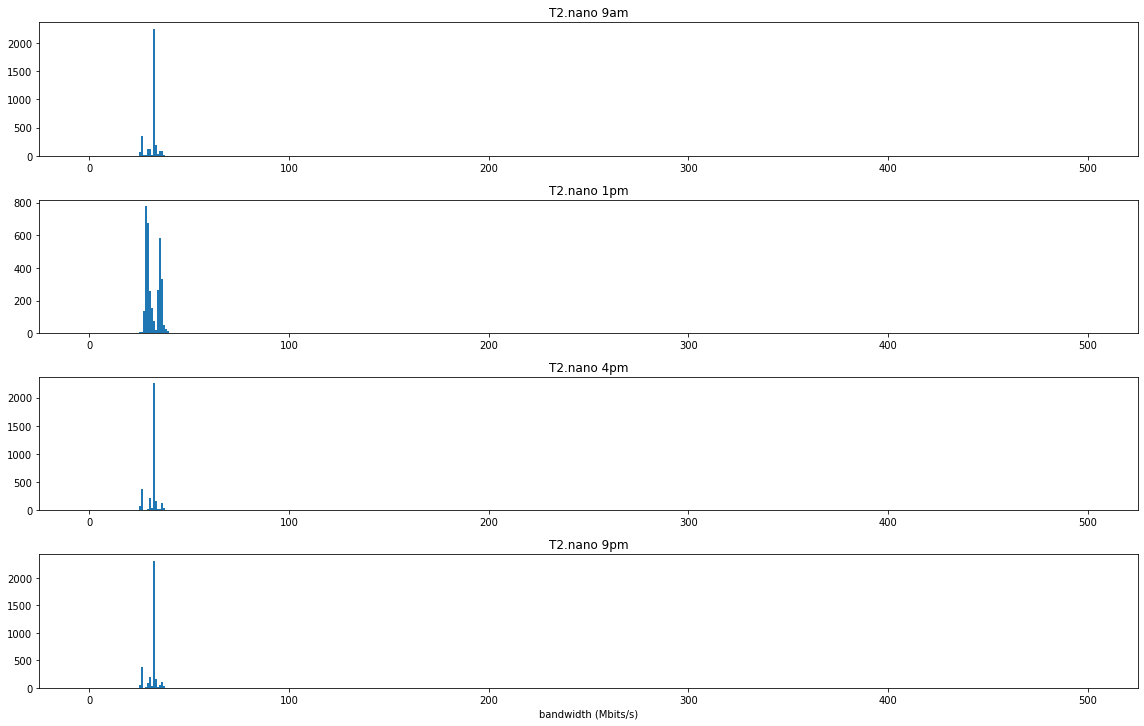

In [297]:
fig, ax = plt.subplots(4, 1, figsize=(16,10))
r = [0, 500]
ax[0].hist(df_t2nano_9am['Bandwidth'], bins=500, range=r)
ax[0].set_title('T2.nano 9am')
ax[1].hist(df_t2nano_1pm['Bandwidth'], bins=500, range=r)
ax[1].set_title('T2.nano 1pm')
ax[2].hist(df_t2nano_4pm['Bandwidth'], bins=500, range=r)
ax[2].set_title('T2.nano 4pm')
ax[3].hist(df_t2nano_9pm['Bandwidth'], bins=500, range=r)
ax[3].set_title('T2.nano 9pm')
fig.tight_layout()
plt.xlabel('bandwidth (Mbits/s)')
plt.show()

We also visualize the distribution of bandwidth of **T2.large** instance.

In [0]:
# whis=[5,95] means whisker set to 5 and 95 percentile. Below or above them are shown as outliers (circles in the graph)
data = [df_t2large_9am['Bandwidth'], df_t2large_1pm['Bandwidth'], df_t2large_4pm['Bandwidth'], df_t2large_9pm['Bandwidth']]
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(data, whis=[5,95])
ax.set_xticklabels(['9am', '1pm', '4pm', '9pm'], rotation=45)
plt.title("Boxplot T2.large")
plt.show()

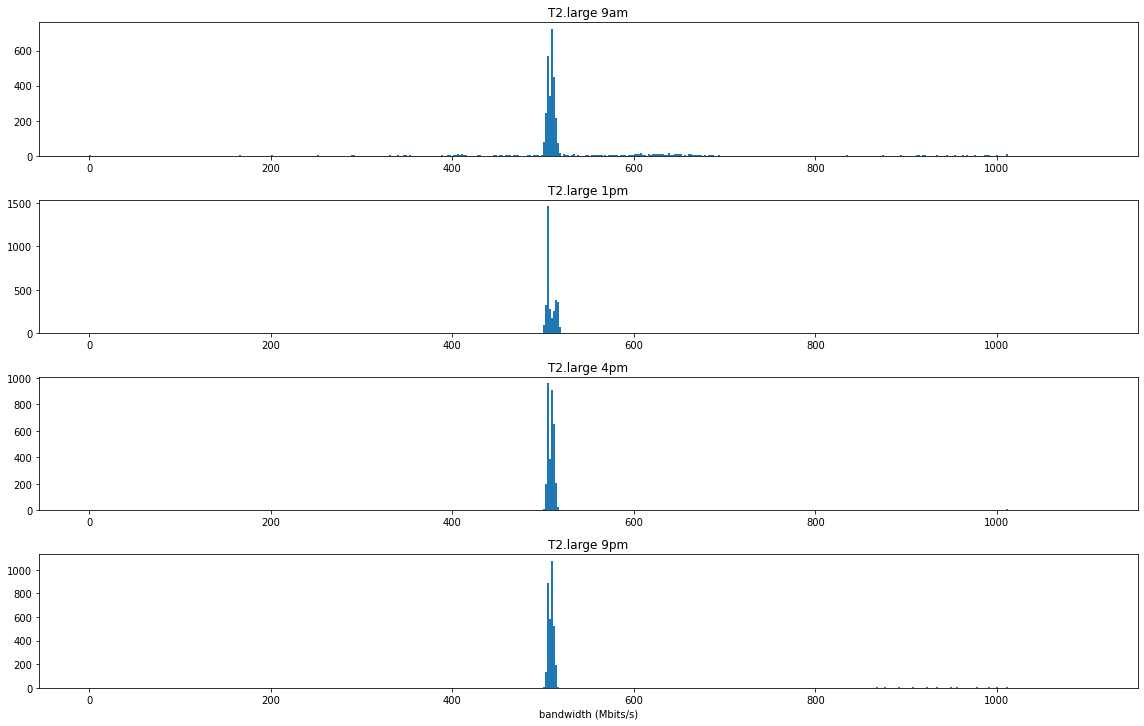

In [298]:
fig, ax = plt.subplots(4, 1, figsize=(16,10))
r = [0, 1100]
ax[0].hist(df_t2large_9am['Bandwidth'], bins=500, range=r)
ax[0].set_title('T2.large 9am')
ax[1].hist(df_t2large_1pm['Bandwidth'], bins=500, range=r)
ax[1].set_title('T2.large 1pm')
ax[2].hist(df_t2large_4pm['Bandwidth'], bins=500, range=r)
ax[2].set_title('T2.large 4pm')
ax[3].hist(df_t2large_9pm['Bandwidth'], bins=500, range=r)
ax[3].set_title('T2.large 9pm')
fig.tight_layout()
plt.xlabel('bandwidth (Mbits/s)')
plt.show()

We also visualize the distribution of bandwidth of **T2.xLarge** instance.

In [0]:
# whis=[5,95] means whisker set to 5 and 95 percentile. Below or above them are shown as outliers (circles in the graph)
data = [df_t2xlarge_9am['Bandwidth'], df_t2xlarge_1pm['Bandwidth'], df_t2xlarge_4pm['Bandwidth'], df_t2xlarge_9pm['Bandwidth']]
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(data, whis=[5,95])
ax.set_xticklabels(['9am', '1pm', '4pm', '9pm'], rotation=45)
plt.title("Boxplot T2.xlarge")
plt.show()

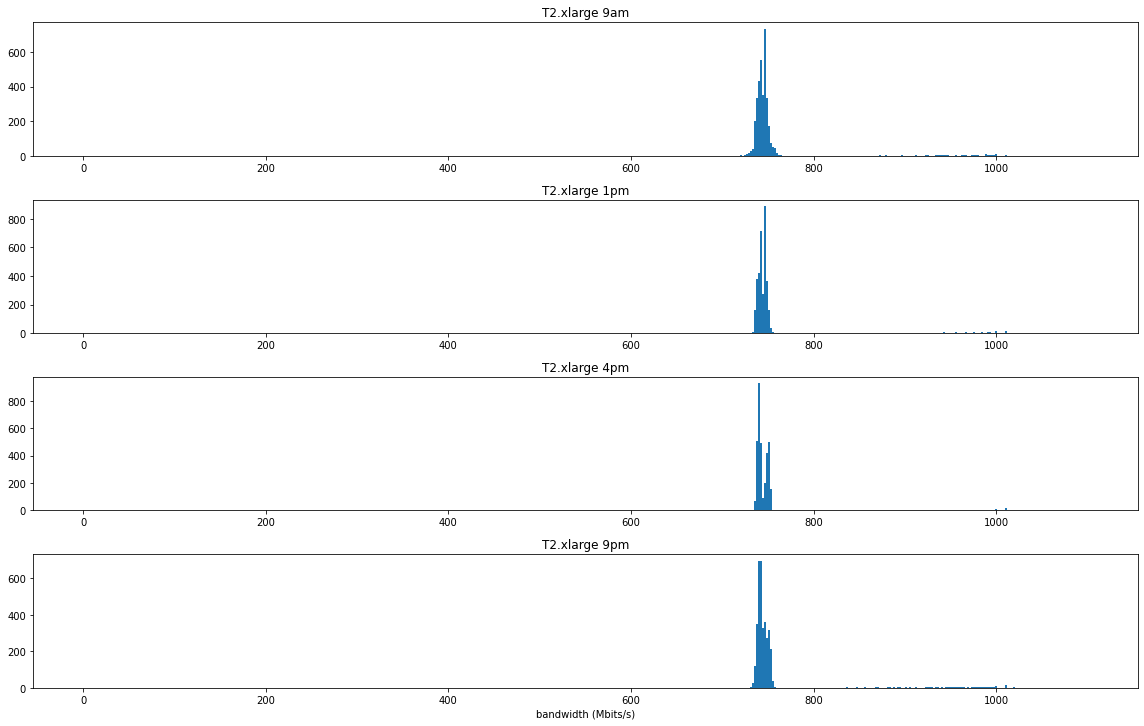

In [299]:
fig, ax = plt.subplots(4, 1, figsize=(16,10))
r = [0, 1100]
ax[0].hist(df_t2xlarge_9am['Bandwidth'], bins=500, range=r)
ax[0].set_title('T2.xlarge 9am')
ax[1].hist(df_t2xlarge_1pm['Bandwidth'], bins=500, range=r)
ax[1].set_title('T2.xlarge 1pm')
ax[2].hist(df_t2xlarge_4pm['Bandwidth'], bins=500, range=r)
ax[2].set_title('T2.xlarge 4pm')
ax[3].hist(df_t2xlarge_9pm['Bandwidth'], bins=500, range=r)
ax[3].set_title('T2.xlarge 9pm')
fig.tight_layout()
plt.xlabel('bandwidth (Mbits/s)')
plt.show()

We also visualize the distribution of bandwidth of **M4.Large** instance.

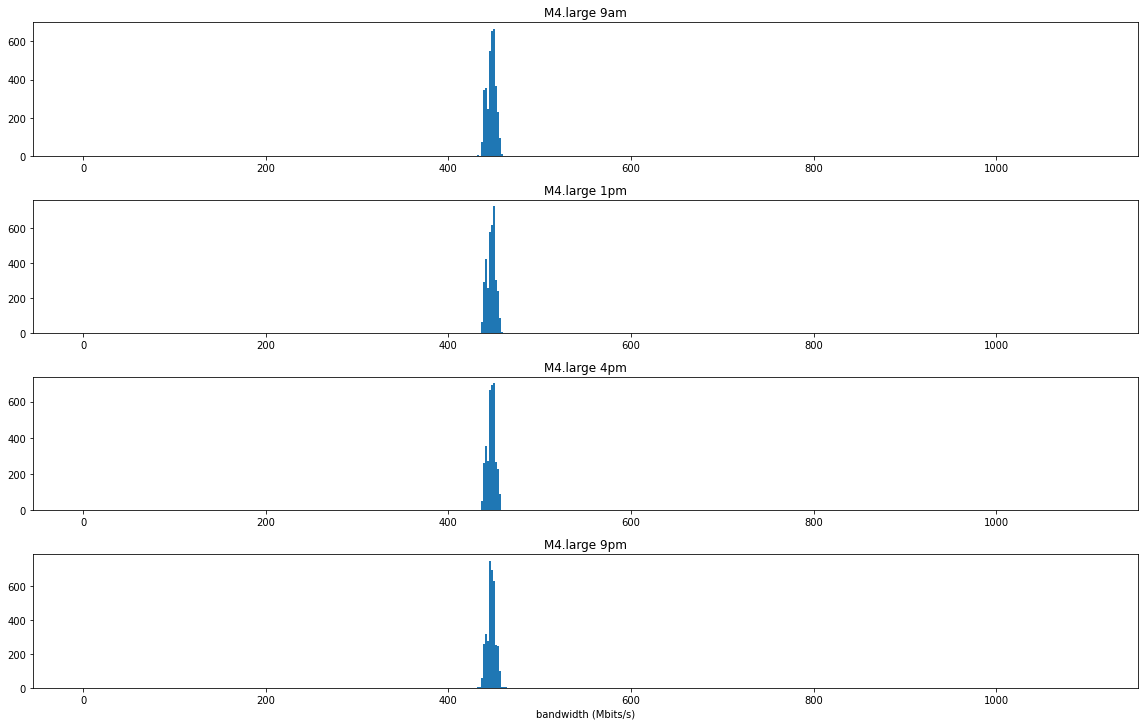

In [300]:
fig, ax = plt.subplots(4, 1, figsize=(16,10))
r = [0, 1100]
ax[0].hist(df_m4large_9am['Bandwidth'], bins=500, range=r)
ax[0].set_title('M4.large 9am')
ax[1].hist(df_m4large_1pm['Bandwidth'], bins=500, range=r)
ax[1].set_title('M4.large 1pm')
ax[2].hist(df_m4large_4pm['Bandwidth'], bins=500, range=r)
ax[2].set_title('M4.large 4pm')
ax[3].hist(df_m4large_9pm['Bandwidth'], bins=500, range=r)
ax[3].set_title('M4.large 9pm')
fig.tight_layout()
plt.xlabel('bandwidth (Mbits/s)')
plt.show()

## Time series plot for session convergence to average speed

One thing we noticed across all our instances is that the initial tests returned very high bandwidth rates that then converged to a stable average.  In addition to the average speeds themselves, what differed was the rate at which different intances converged.  

The plots below illustrate this.  We display time on the horizontal axis and bandwidth (in SD units relative to the instance-time specific mean) on the vertical axis.  We see that the `m.4large` instances converged quickly to its mean whereas the `t.nano` and `large` instances were much slower and more volatile in their convergence, espcially at earlier times of the day.

We do not know exactly why this is happening, but we have some hypotheses:
1. AWS is optimizing bandwidth to reflecct the small datapackets we are sending
2. AWS has immediate bandwidth needs early on in calculation but these diminish quickly.
3. Different instance types have more stable access to bandwidth that affect convergence.

We are not yet able to test these hypotheses.

In [0]:
df_d = {"t2.nano": [df_t2nano_9am, df_t2nano_1pm, df_t2nano_4pm, df_t2nano_9pm],
        "t2.large": [df_t2large_9am, df_t2large_1pm, df_t2large_4pm, df_t2large_9pm],
        "t2.xlarge": [df_t2xlarge_9am, df_t2xlarge_1pm, df_t2xlarge_4pm, df_t2xlarge_9pm],
        "m4.large": [df_m4large_9am, df_m4large_1pm, df_m4large_4pm, df_m4large_9pm]}
range_d = {"t2.nano": 300, "t2.large": 300, "t2.xlarge": 300, "m4.large": 10, "m4.xlarge": 10}

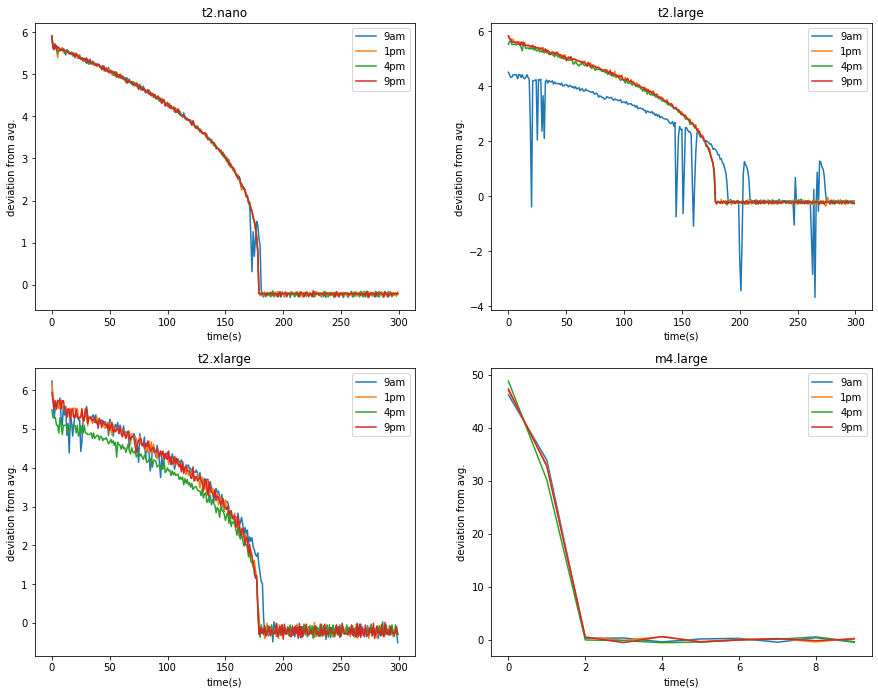

In [302]:
count = 1
plt.figure(figsize=(15,18))
for instance in df_d.keys():
    plt.subplot(3,2,count)
    n = range_d[instance]
    x = np.array([i for i in range(n)])
    session = ['9am', '1pm', '4pm', '9pm']
    cur = 0
    for df in df_d[instance]:
        y = np.array(df['Bandwidth'])
        mean, std = np.mean(y), np.std(y)
        y = (y-mean)/std
        plt.plot(x, y[:n], label=session[cur])
        cur = cur + 1
    plt.xlabel('time(s)')
    plt.ylabel('deviation from avg.')
    plt.title(instance)
    plt.legend()
    count = count+1
plt.show()